In [ ]:
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / "src"))

print(f"Project root: {project_root}")

from IPython.display import Image, display
from mitre_agentic.workflows.graph import create_graph_no_checkpointing

#print("All imports successful!")

Project root: /Users/Inoussa/Documents/agenticAI/MCP/MITRE-AGENTIC-THREAT-INVESTIGATION/src/mitre_agentic
All imports successful!


In [3]:
# Create the workflow graph
print("="*80)
print("MITRE ATT&CK Investigation Workflow - Graph Visualization")
print("="*80 + "\n")

# Create graph
graph = create_graph_no_checkpointing()


MITRE ATT&CK Investigation Workflow - Graph Visualization



In [4]:
# Display nodes
print("Workflow Graph Structure\n")

nodes = list(graph.get_graph().nodes)
print(f"Nodes ({len(nodes)}):\n")

for i, node in enumerate(nodes, 1):
    if node == "__start__":
        print(f"  {i}. 🚀 START")
    elif node == "__end__":
        print(f"  {i}. 🏁 END")
    else:
        # Add emoji indicators
        emoji = {
            "triage": "🔍",
            "mapping": "🗺️",
            "intel": "🕵️",
            "detection": "🔬",
            "mitigation": "🛡️",
            "detection_reasoning": "🧠",
            "visualization": "🎨",
            "report": "📄"
        }.get(node, "⚙️")
        
        print(f"  {i}. {emoji} {node}")

Workflow Graph Structure

Nodes (10):

  1. 🚀 START
  2. 🔍 triage
  3. 🗺️ mapping
  4. 🕵️ intel
  5. 🔬 detection
  6. 🛡️ mitigation
  7. 🧠 detection_reasoning
  8. 🎨 visualization
  9. 📄 report
  10. 🏁 END


In [5]:
# Display edges
edges = list(graph.get_graph().edges)
print(f"\nEdges ({len(edges)}):\n")

for edge in edges:
    if isinstance(edge, tuple):
        source = edge[0]
        target = edge[1] if len(edge) > 1 else "?"
        
        # Clean up names
        if source == "__start__":
            source = "START"
        if target == "__end__":
            target = "END"
        
        # Check if conditional
        is_conditional = len(edge) > 2 and isinstance(edge[2], dict) and "data" in edge[2]
        
        if is_conditional:
            print(f"  {source} ─?→ {target} [conditional]")
        else:
            print(f"  {source} ──→ {target}")
    else:
        print(f"  {edge}")


Edges (12):

  START ──→ triage
  detection ──→ detection_reasoning
  detection ──→ visualization
  detection_reasoning ──→ visualization
  intel ──→ visualization
  mapping ──→ detection
  mapping ──→ intel
  mapping ──→ mitigation
  mitigation ──→ visualization
  triage ──→ mapping
  visualization ──→ report
  report ──→ END


In [7]:
# Graph statistics
print("\n" + "="*80)
print("Graph Statistics")
print("="*80 + "\n")

stats = {
    "Total nodes": len(nodes),
    "Total edges": len(edges),
    "Parallel nodes": "3 (intel, detection, mitigation)",
    "Conditional nodes": "1 (detection_reasoning)",
    "LLM nodes": "3 (triage, detection_reasoning, report)",
    "MCP nodes": "5 (mapping, intel, detection, mitigation, visualization)"
}

for key, value in stats.items():
    print(f"  {key:20s}: {value}")

print("\n" + "="*80)


Graph Statistics

  Total nodes         : 10
  Total edges         : 12
  Parallel nodes      : 3 (intel, detection, mitigation)
  Conditional nodes   : 1 (detection_reasoning)
  LLM nodes           : 3 (triage, detection_reasoning, report)
  MCP nodes           : 5 (mapping, intel, detection, mitigation, visualization)



In [8]:
# Generate and save Mermaid diagram
print("\n" + "="*80)
print("Mermaid Diagram")
print("="*80 + "\n")

try:
    mermaid = graph.get_graph().draw_mermaid()
    
    # Save to file
    output_dir = project_root / "out"
    output_dir.mkdir(exist_ok=True)
    
    mermaid_file = output_dir / "workflow_graph.mmd"
    with open(mermaid_file, "w") as f:
        f.write(mermaid)
    
    print(f"Mermaid diagram saved to: {mermaid_file}")
    print(f"\nPaste into https://mermaid.live/ to visualize interactively\n")
    
    # Display first 1000 chars
    print("Preview (first 1000 characters):")
    print("-" * 80)
    print(mermaid[:1000])
    if len(mermaid) > 1000:
        print("...")
    print("-" * 80)
    
except Exception as e:
    print(f"Could not generate Mermaid: {e}")


Mermaid Diagram

Mermaid diagram saved to: /Users/Inoussa/Documents/agenticAI/MCP/MITRE-AGENTIC-THREAT-INVESTIGATION/src/mitre_agentic/out/workflow_graph.mmd

Paste into https://mermaid.live/ to visualize interactively

Preview (first 1000 characters):
--------------------------------------------------------------------------------
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	triage(triage)
	mapping(mapping)
	intel(intel)
	detection(detection)
	mitigation(mitigation)
	detection_reasoning(detection_reasoning)
	visualization(visualization)
	report(report)
	__end__([<p>__end__</p>]):::last
	__start__ --> triage;
	detection -.-> detection_reasoning;
	detection -.-> visualization;
	detection_reasoning --> visualization;
	intel --> visualization;
	mapping --> detection;
	mapping --> intel;
	mapping --> mitigation;
	mitigation --> visualization;
	triage --> mapping;
	visualization --> report;
	report --> __end__;
	classDef default fill:#f2f


Visual Graph Rendering (Method 1: Mermaid PNG)

✅ PNG saved to: /Users/Inoussa/Documents/agenticAI/MCP/MITRE-AGENTIC-THREAT-INVESTIGATION/src/mitre_agentic/out/workflow_graph.png


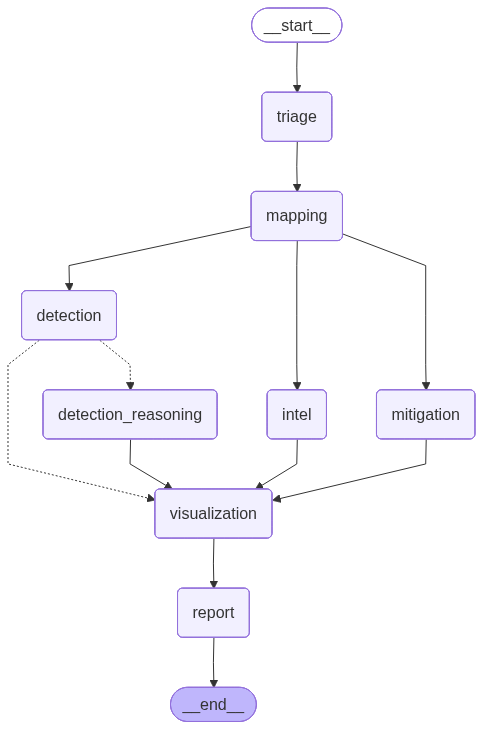

In [ ]:
# Cell 7: Try to render PNG using draw_mermaid_png()
print("\n" + "="*80)
print("Visual Graph Rendering (Method 1: Mermaid PNG)")
print("="*80 + "\n")

try:
    # Try to get PNG from mermaid
    png_data = graph.get_graph().draw_mermaid_png()
    
    # Save to file
    png_file = output_dir / "workflow_graph.png"
    with open(png_file, "wb") as f:
        f.write(png_data)
    
    print(f"PNG saved to: {png_file}")
    
    # Display in notebook
    display(Image(data=png_data))
    
except Exception as e:
    print(f"Method 1 failed: {e}")
    print(" Trying alternative method...")